In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Zeros,RandomNormal,HeNormal
from init_utils import load_dataset, plot_decision_boundary, predict_dec  # Use original utility

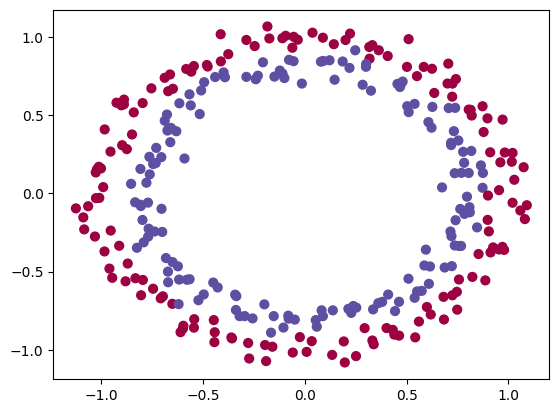

In [2]:
#load dataset
train_X,train_Y,test_X,test_Y = load_dataset()

In [5]:
# Cell 2: Helper function to build model with different initializations
def build_model(initialization="he"):
    if initialization == "zeros":
        initializer = Zeros()
    elif initialization == "random":
        initializer = RandomNormal(mean=0.0, stddev=1.0)
    elif initialization == "he":
        initializer = HeNormal()
    else:
        raise ValueError("Unknown initialization: " + initialization)

    model = Sequential([
        Dense(10, activation='relu', input_shape=(2,), kernel_initializer=initializer),
        Dense(5, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid', kernel_initializer=initializer),
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [7]:
def train_and_evaluate(initialization):
  model = build_model(initialization)
  history = model.fit(train_X.T,train_Y.T,epochs=150,verbose=0)

 # Plot loss
  plt.plot(history.history['loss'])
  plt.title(f"Loss curve ({initialization} initialization)")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

 #Accuracy on train/test
  train_acc = model.evaluate(train_X.T,train_Y.T,verbose=0)[1]
  test_acc = model.evaluate(test_X.T,test_Y.T,verbose=0)[1]
  print(f"Train Accuracy: {train_acc*100:.2f}%")
  print(f"Test Accuracy: {test_acc*100:.2f}%")

  # Plot decision boundary
  plot_decision_boundary(lambda x: model.predict(x).flatten(), train_X, train_Y)
  plt.title(f"Decision Boundary - {initialization} init")
  plt.show()


--- Initialization: zeros ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


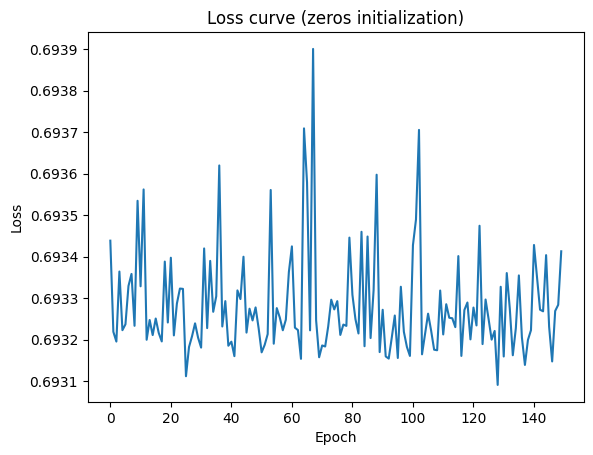

Train Accuracy: 50.00%
Test Accuracy: 50.00%
5473/5473 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


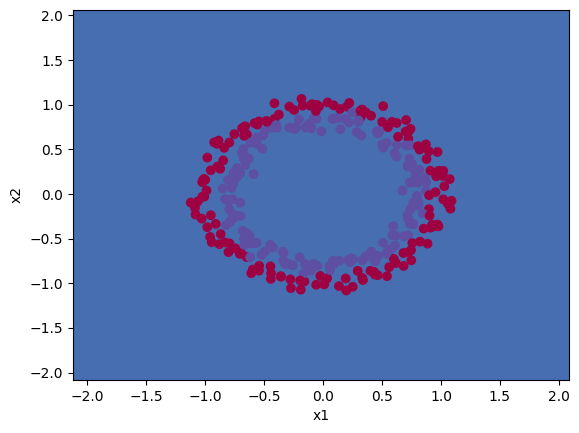

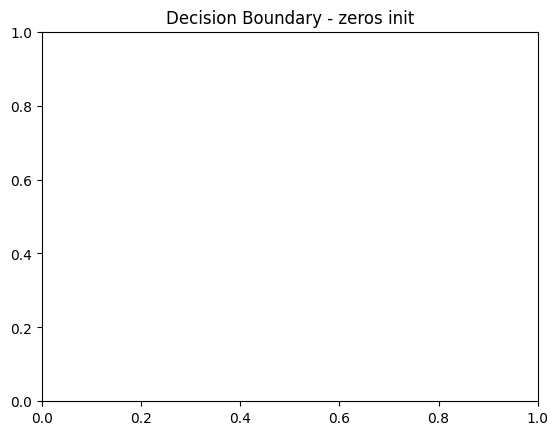

--- Initialization: random ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


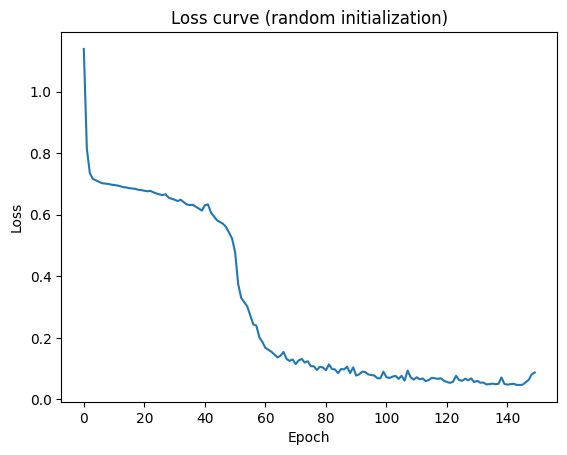

Train Accuracy: 98.67%
Test Accuracy: 93.00%
5473/5473 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


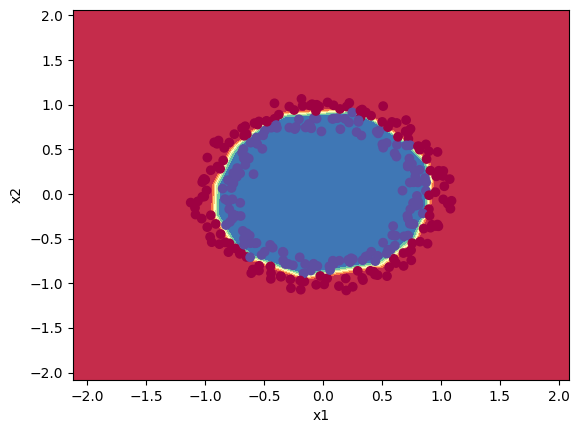

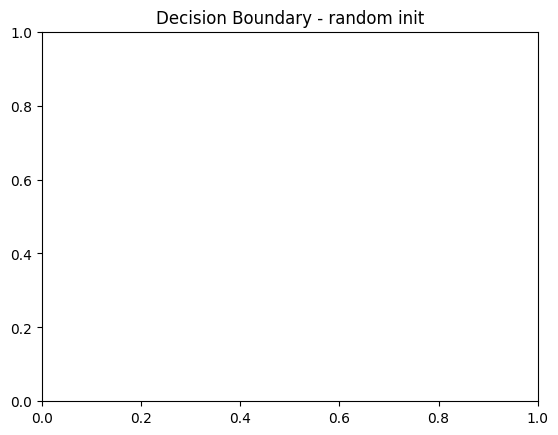

--- Initialization: he ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


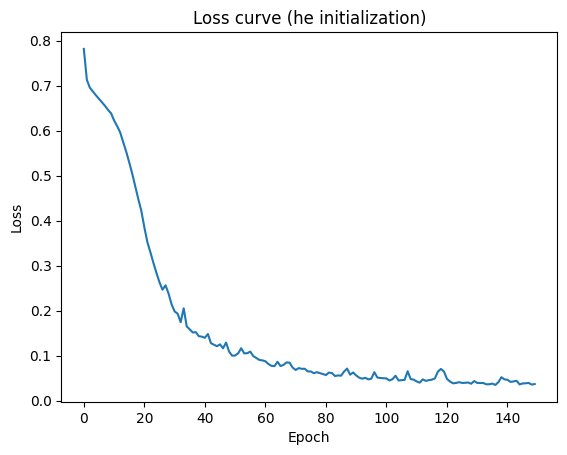

Train Accuracy: 99.00%
Test Accuracy: 95.00%
5473/5473 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


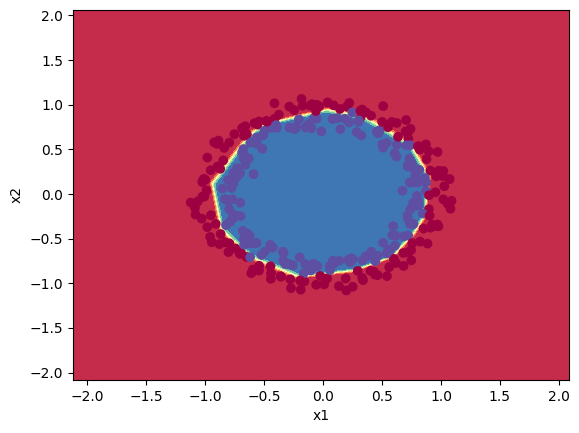

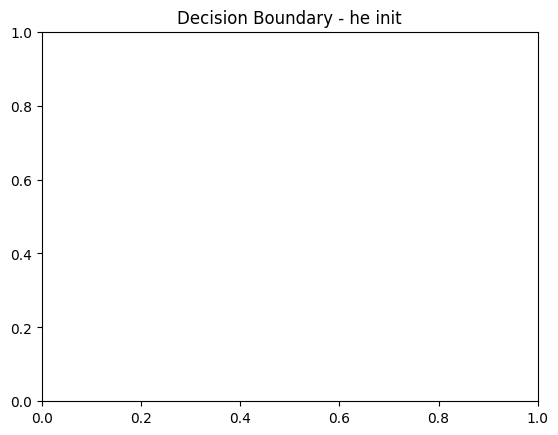

In [8]:
# Cell 4: Run for all initializations
for init in ["zeros", "random", "he"]:
    print(f"--- Initialization: {init} ---")
    train_and_evaluate(init)
